<a href="https://colab.research.google.com/github/gabrielasenareis/python-basico/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as srn
import statistics as est
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()



Saving Churn.csv to Churn.csv


In [3]:
dataset = pd.read_csv('Churn.csv')
# formato
dataset.shape

(999, 1)

In [4]:
# o arquivo veio com um erro e todas as 12 colunas estavam em uma só, então
# vou usar o método 'split' pra fazer essa separação

# vou especificar queele não tem cabeçalho
dataset = pd.read_csv('Churn.csv', header=None)

# observei que o que separava os dados era o " ; ", então vou usar ele como separador
dataset = dataset[0].str.split(';', expand=True)

# fiz a atribuição de nomes as colunas
dataset.columns = [ "Id", 'Score', "Estado", 'Gênero', 'Idade', 'Patrimônio', 'Saldo', 'Produtos', 'TemCartCrédito', 'Ativo', 'Salário', 'Saiu']

# salvei o dataFrame com as colunas renomeadas em um novo arquivo CSV
dataset.to_csv('Churn_com_colunas.csv', index=False)

# vou verificar as primeiras linhas do dataFrame para garantir que as colunas foram separadas corretamente
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,X0,X1,X2,X3,X4,X4,X6,X7,X8,X9,X10,X11
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0


In [5]:
# vou excluir a primeira linha que ficou com dados sem valor
dataset.drop(0, axis=0, inplace=True)
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0


In [47]:
# explorando os dados categóricos
# estado

estado_agrupado = dataset.groupby(['Estado']).size()
estado_agrupado

# pode ser observado que existem estados que não existem, como "td" e "rp",

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

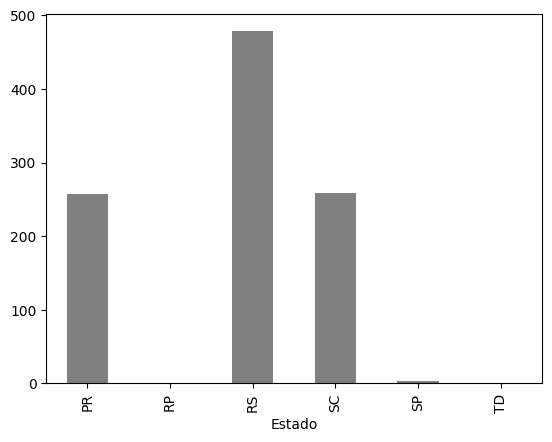

In [7]:
# outra forma de visualizar é com gráficos
agrupado.plot.bar(color = 'gray')

In [8]:
# genero
agrupado1 = dataset.groupby(['Gênero']).size()
agrupado1

# pode se observar que a mesma informação está com definições diferentes,
# como "fem", "f" e "feminino", além valores NaN

Gênero
               8
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

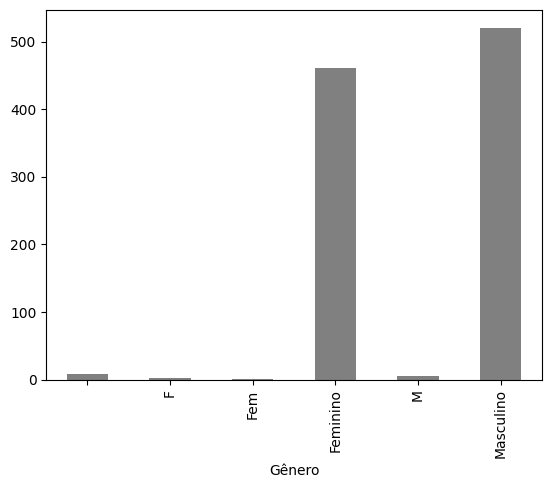

In [9]:
# analisando agora no gráfico
agrupado1.plot.bar(color = "gray")

In [10]:
# explorando agora os dados numéricos
# vamos verificar se o tipo está sendo lido corretamente
# score
print(dataset['Score'].dtype)


object


In [11]:
# os dados sa coluna "score" estão sendo lidos como strings, vamos converter
# para números
dataset['Score'] = pd.to_numeric(dataset['Score'])
print(dataset['Score'].dtype)

int64


In [12]:
# vamos detalhar as informações sobre o score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

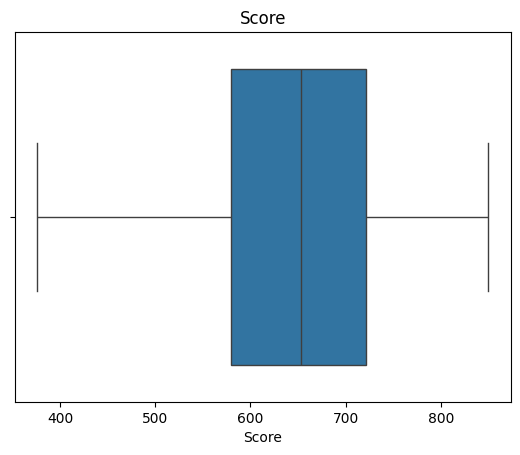

In [13]:
# vamos observar com um gráfico boxplot

srn.boxplot(dataset['Score'], orient = "h").set_title('Score')


Text(0.5, 1.0, 'Score')

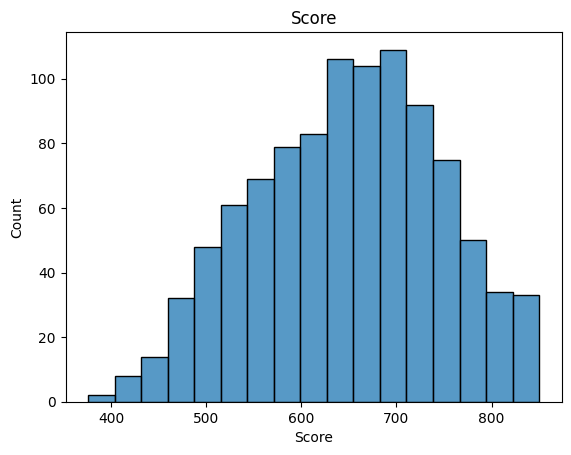

In [14]:
# vamos visualizar agora os mesmos dados com um histograma

srn.histplot(dataset['Score']).set_title('Score')

In [15]:
# idade
print(dataset['Idade'].dtype)

object


In [16]:
# os dados da coluna "idade" também estão sendo lidos como strings, vamos converter

dataset['Idade'] = pd.to_numeric(dataset['Idade'])
print(dataset['Idade'].dtype)

int64


In [17]:
# vou analisar os dados da coluna idade
dataset['Idade'].describe()

# se observa que existem valores que não se enquadram num contexto
# real de idade, como "-20" e "140"

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

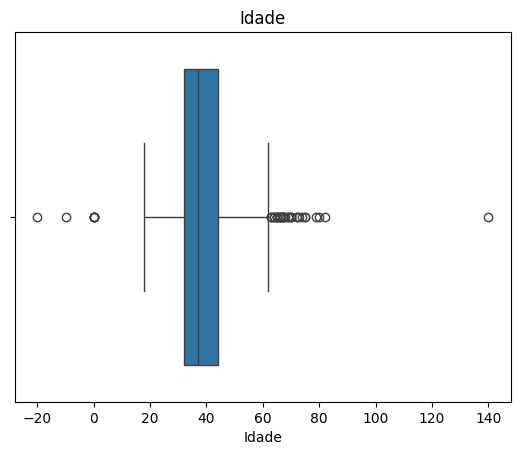

In [18]:
# vamo visualizar no boxplot

srn.boxplot(dataset['Idade'], orient ="h").set_title('Idade')

# os valores fora de contexto foram mostrados como outliers

Text(0.5, 1.0, 'Idade')

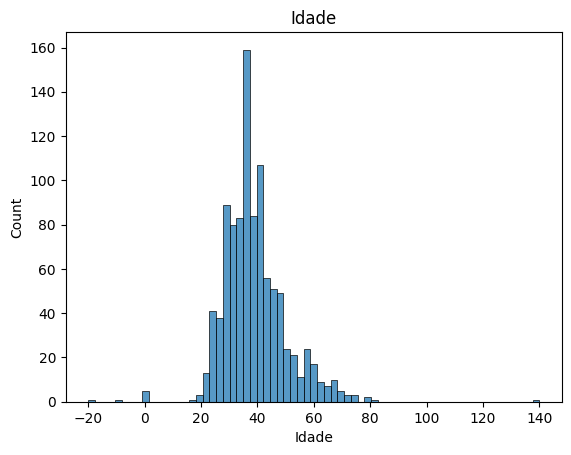

In [19]:
# agora vamos visualizar com histograma
srn.histplot(dataset['Idade']).set_title('Idade')

In [20]:
# vi que todas as colunas numericas estão sendo lidas como strings, então vou fazer
# a alteraçao logo em todas
converterColuna = ['Id', 'Patrimônio', 'Saldo', 'Produtos', 'TemCartCrédito', 'Ativo', 'Salário', 'Saiu']
dataset[converterColuna] = dataset[converterColuna].apply(pd.to_numeric)
# testando se funcionou
print(dataset['Id'].dtype)

int64


In [21]:
# saldo
dataset['Saldo'].describe()

#observa-se que o primeiro quartil e o valor mínimo são iguais a 0

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

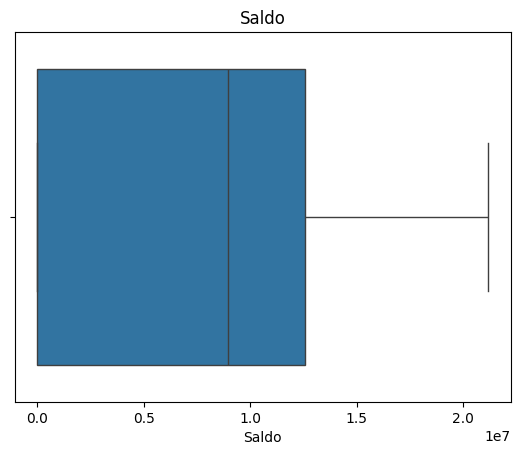

In [22]:
# vamo visualizar no boxplot

srn.boxplot(dataset['Saldo'], orient ="h").set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

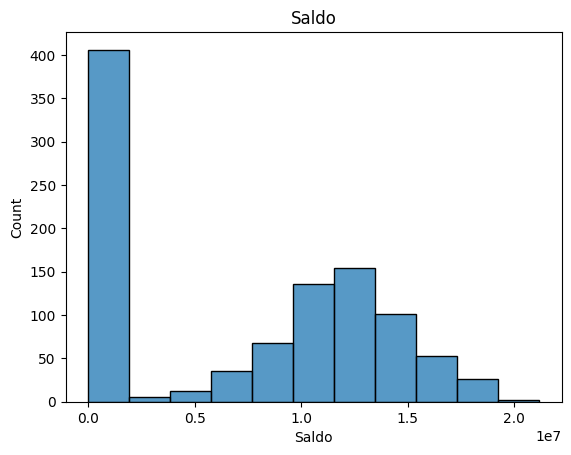

In [23]:
# vamo visualizar no histograma

srn.histplot(dataset['Saldo']).set_title('Saldo')

In [55]:
# salário
dataset['Salário'].describe()
#observa-se valores muito acima da mediana

count    9.980000e+02
mean     3.505879e+07
std      5.289889e+08
min      9.677000e+03
25%      2.849010e+06
50%      8.637196e+06
75%      1.401381e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

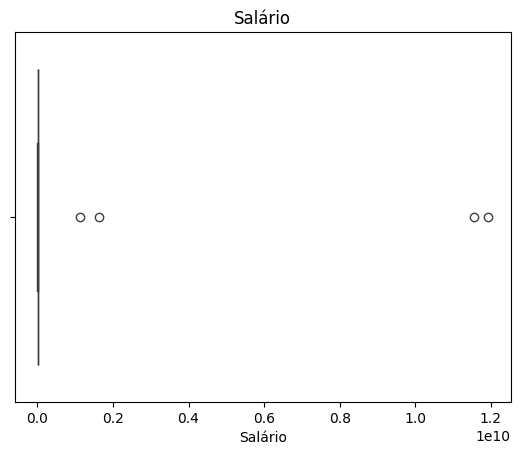

In [25]:
# vamo visualizar no boxplot

srn.boxplot(dataset['Salário'], orient ="h").set_title('Salário')

#observa-se uma grande concentração de valores no "0"

Text(0.5, 1.0, 'Salário')

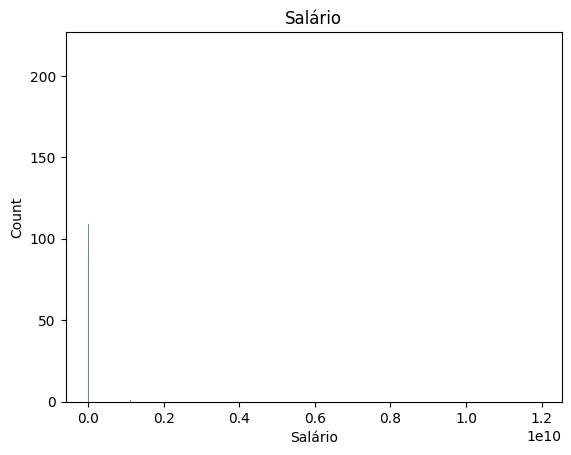

In [26]:
# vamo visualizar no histograma

srn.histplot(dataset['Salário']).set_title('Salário')

# observa-se novamente a concentração no valor 0, provavelmente
# porque os clientes não informaram os salários

In [27]:
# contando os valores NaN
dataset.isnull().sum()

# na análise da coluna "gênero", eu tinha observado antes que tinham 8 valores NaN
# mas aqui não estão aparecendo, provavelmente estão sendo lidos como strings ou
# espaços em branco

Id                0
Score             0
Estado            0
Gênero            0
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [28]:
# substituindo espaços por valores NaN
# a expressão r'^\s*$' está procurando por strings que contenham apenas
# espaços em branco do início ao fim
dataset['Gênero'] = dataset['Gênero'].replace(r'^\s*$', np.nan, regex=True)
dataset['Gênero'].isnull().sum()

8

In [29]:
# contando os valores NaN novamente
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [30]:
# Vou substituir os valores Nas pela mediada
# começando com o salário
medianaSalario = est.median(dataset['Salário'])
medianaSalario

70518.0

In [31]:
# substituindo

dataset['Salário'].fillna(medianaSalario, inplace=True)
# verificando se funcionou
dataset['Salário'].isnull().sum()

0

In [33]:
# vamos observar que no gênero precisa padronizar
# tudo para "feminino" e "masculino" e substituir os valores NaN
agrupado1 = dataset.groupby(['Gênero']).size()
agrupado1

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [34]:
# vou jogar todos os valores NaN para a 'moda' que é o 'masculino'

dataset['Gênero'].fillna('Masculino', inplace=True)
# verificando
dataset['Gênero'].isnull().sum()

0

In [35]:
# padronizando a coluna de 'gênero'
# substituindo o valor 'M' por 'masculino' usando uma condição lógica
dataset.loc[dataset['Gênero'] == 'M', 'Gênero'] = "Masculino"

#substituindo 'F' e 'Fem' por 'feminino' usando um operador de conjunto
# para substituir os dois valores ao mesmo tempo
dataset.loc[dataset['Gênero'].isin(['F', 'Fem']), 'Gênero'] = "Feminino"

# vendo o resultado
agrupado3 = dataset.groupby(['Gênero']).size()
agrupado3

Gênero
Feminino     464
Masculino    535
dtype: int64

In [36]:
# idades fora do domínio "-20" e "140"

dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [37]:
# vamos visualizar quantos registros fora desse domínio existem
# criando uma condição lógica

dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
868,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
985,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
991,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [39]:
# vamos calcular a mediana para substituir esses valores
# porque a mediana é menos sujeita a outliers

medianaIdade = est.median(dataset['Idade'])
medianaIdade

37

In [40]:
# substituindo pela mediana usando uma condição lógica

dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = medianaIdade

# vamos verificar se ainda existem valores outliers
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]


,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [43]:
# vamos verificar se existem dados duplicados, buscando pelo 'ID'
# o keep automaticamente é deifnido como 'first' ou seja, ele não
# inclui o primeiro duplicado, por isso coloquei como 'false'
dataset[dataset.duplicated(['Id'], keep= False)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
82,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [44]:
# excluindo o duplicado
dataset.drop_duplicates(subset='Id', keep = 'first', inplace=True)
# vamos verificar se funcionou
dataset[dataset.duplicated(['Id'], keep= False)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [48]:
# agora vamos excluir os estados inexistentes
estado_agrupado
# observamos que existe um 'rp' e um 'td'

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [54]:
# vamos substituir esses estados errados pela 'moda' que é 'RS'

dataset.loc[dataset['Estado'].isin(['TD', 'RP']), 'Estado'] = 'RS'
#vamos verificar se funcionou
estado_agrupado = dataset.groupby(['Estado']).size()
estado_agrupado


Estado
PR    257
RS    479
SC    258
SP      4
dtype: int64

In [57]:
# vamos tratar agora os valores outliers nos salários
# vamos considerar 2 desvios padrão
desv = est.stdev(dataset['Salário'])
desv

528988918.4679201

In [58]:
# vamos checar se algum atende esse critério de ser maior
# que 2 desvios padrão

dataset.loc[dataset['Salário'] >= 2 * desv]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
8,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
117,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
171,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
231,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [61]:
# vamos substituir esses valores outliers pela mediana
medianaSalario = est.median(dataset['Salário'])

dataset.loc[dataset['Salário'] >= 2*desv, 'Salário'] = medianaSalario
#vamos verificar se a substituição foi realizada com sucesso
dataset.loc[dataset['Salário'] >= 2 * desv]


,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [62]:
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [64]:
dataset.shape

(998, 12)